# Log 1.3
1. try sigmoid activation
2. less overtraining, but much worse results sub 50% accuracy
3. Idea: back to softmax activation, try having less dropout


In [1]:
# load features and labels
import keras
#keras.__version__ 2.4.3
import numpy as np

train_features = np.load("saved_train_features_augmented.npy"); # load augmented data features
validation_features = np.load("saved_validation_features.npy");
test_features = np.load("saved_test_features.npy");
train_labels = np.load("saved_train_labels_augmented.npy"); # load augmented data labels
validation_labels = np.load("saved_validation_labels.npy");
test_labels = np.load("saved_test_labels.npy");


In [2]:
# build network and print summary
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(2*2*128, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2*128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2*2*64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2*2*32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2*2*16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))

model.summary()


# add optimizer
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

In [3]:
# train and save model
history = model.fit(train_features, train_labels,
                    epochs=60,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

model.save('trash-classifier-1-3.h5')

Epoch 1/60
58/58 [==============================] - 6s 100ms/step - loss: 3.4567 - acc: 0.2233 - val_loss: 3.2516 - val_acc: 0.2228
Epoch 2/60
58/58 [==============================] - 5s 91ms/step - loss: 3.2035 - acc: 0.2457 - val_loss: 3.0665 - val_acc: 0.2011
Epoch 3/60
58/58 [==============================] - 6s 105ms/step - loss: 3.0542 - acc: 0.2362 - val_loss: 2.9403 - val_acc: 0.2163
Epoch 4/60
58/58 [==============================] - 6s 97ms/step - loss: 2.9244 - acc: 0.2302 - val_loss: 2.8333 - val_acc: 0.2033
Epoch 5/60
58/58 [==============================] - 5s 94ms/step - loss: 2.8393 - acc: 0.2276 - val_loss: 2.7633 - val_acc: 0.2413
Epoch 6/60
58/58 [==============================] - 6s 96ms/step - loss: 2.7502 - acc: 0.2414 - val_loss: 2.6883 - val_acc: 0.1967
Epoch 7/60
58/58 [==============================] - 5s 94ms/step - loss: 2.6852 - acc: 0.2405 - val_loss: 2.6254 - val_acc: 0.2717
Epoch 8/60
58/58 [==============================] - 5s 92ms/step - loss: 2.6156 -

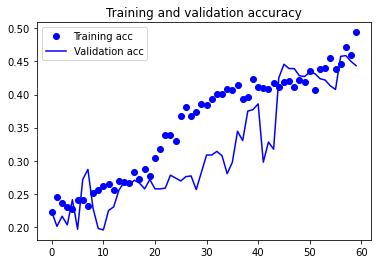

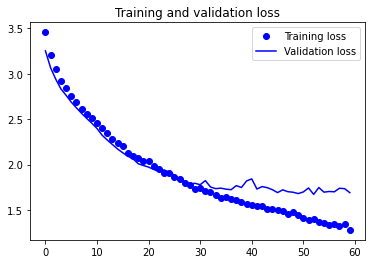

In [4]:
# plot accuracy and loss graphs
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()